In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
# Ignore warnings
warnings.filterwarnings('ignore')
sns.set_style("ticks")

/Users/jty/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Set dataset folder and load data

In [2]:
PATH = "./datasets/"

train = pd.read_csv(PATH + "train.csv", index_col="date_time", parse_dates=True)
test = pd.read_csv(PATH + "test.csv", index_col="date_time", parse_dates=True)
submission = pd.read_csv(PATH + "sample_submission.csv", index_col="date_time", parse_dates=True)

## Data Exploring part

Display train set and test set data

In [58]:
train.head()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,...,dt-8,abs_hum-4,rel_hum-4,abs_hum-8,rel_hum-8,s1-1,s2-1,s3-1,s4-1,s5-1
date_time,,,,,,,,,,,,,,,,,,,,,
2010-03-10 18:00:00,-0.980268,-0.089771,-0.884005,1.352767,0.530936,0.554298,0.655449,0.773485,1.252763,2.564949,...,13.1,0.7578,46.0,0.7578,46.0,1387.2,1087.8,1056.0,1742.8,1293.4
2010-03-10 19:00:00,-0.967668,-0.130004,-0.964984,0.858115,-0.176941,1.010081,-0.181170,0.033034,1.131402,2.388763,...,13.2,0.7255,45.3,0.7255,45.3,-108.1,-199.6,141.5,-292.9,-282.5
2010-03-10 20:00:00,-1.043269,0.496484,-0.903059,1.099721,-0.030117,0.567827,0.207862,0.311129,1.163151,2.322388,...,12.6,0.7502,56.2,0.7502,56.2,52.8,41.4,-137.3,136.2,106.1
2010-03-10 21:00:00,-1.244870,0.852835,-0.811551,1.049844,-0.032245,0.705367,0.066189,0.694329,1.163151,2.370244,...,11.0,0.7867,62.4,0.7867,62.4,-10.9,-0.6,42.7,-49.6,146.2
2010-03-10 22:00:00,-1.131469,0.657417,-0.806286,0.825627,-0.302841,0.956612,-0.279427,0.350969,0.916291,2.001480,...,11.9,0.0310,13.0,0.7888,59.0,-49.0,-76.3,78.0,-121.0,-131.0


In [3]:
train.tail()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
date_time,,,,,,,,,,,
2010-12-31 20:00:00,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5,1.3,5.1,191.1
2010-12-31 21:00:00,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4,1.4,5.8,221.3
2010-12-31 22:00:00,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1,1.6,5.2,227.4
2010-12-31 23:00:00,8.0,40.7,0.4085,952.8,691.9,908.5,917.0,1206.3,1.5,4.6,199.8
2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1,1.4,4.1,186.5


In [4]:
test.head()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
date_time,,,,,,,,
2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1
2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0
2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8
2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0
2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3


In [59]:
test.tail()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,year,month,...,dt-8,abs_hum-4,rel_hum-4,abs_hum-8,rel_hum-8,s1-1,s2-1,s3-1,s4-1,s5-1
date_time,,,,,,,,,,,,,,,,,,,,,
2011-04-04 10:00:00,0.292342,-1.084105,-0.886512,1.138159,0.304316,-1.163183,-0.397965,1.733845,2011,4,...,11.9,0.0037,-38.2,-0.0359,-26.5,56.3,-78.1,20.9,26.5,92.6
2011-04-04 11:00:00,0.456143,-1.440456,-0.999080,0.646252,0.060318,-0.862656,-0.820416,0.709531,2011,4,...,13.5,-0.0327,-38.2,-0.0769,-33.5,-107.5,-68.8,93.3,-147.9,-390.8
2011-04-04 12:00:00,0.720745,-1.641622,-1.177835,0.439880,0.405391,-1.002129,-0.742438,0.217033,2011,4,...,15.6,-0.1147,-28.4,-0.1337,-38.7,-45.1,97.3,-43.3,27.3,-187.9
2011-04-04 13:00:00,1.035747,-2.003721,-1.495482,-0.175575,0.251474,-0.585965,-1.438240,-0.497471,2011,4,...,18.4,-0.2348,-25.1,-0.2411,-49.0,-134.5,-43.4,129.2,-243.6,-272.6
2011-04-04 14:00:00,0.884546,-1.957740,-1.523311,0.151143,0.497599,-0.888102,-1.291139,-0.477813,2011,4,...,18.4,-0.2540,-15.2,-0.2503,-53.4,71.4,69.4,-93.8,51.5,7.5


For a general idea, the time colums varid from 2010-3-10 to 2011-04-04. And there is one line appears in both train set and test set. Thus, delete it from train set

In [5]:
train.drop(train.tail(1).index,inplace=True)

In [6]:
train.tail()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
date_time,,,,,,,,,,,
2010-12-31 19:00:00,9.1,34.3,0.3958,957.9,741.9,970.3,915.1,866.0,1.2,4.9,211.0
2010-12-31 20:00:00,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5,1.3,5.1,191.1
2010-12-31 21:00:00,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4,1.4,5.8,221.3
2010-12-31 22:00:00,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1,1.6,5.2,227.4
2010-12-31 23:00:00,8.0,40.7,0.4085,952.8,691.9,908.5,917.0,1206.3,1.5,4.6,199.8


Get a summary of two datasets

In [7]:
train.describe()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
count,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000
mean,20.879845,47.561885,1.110403,1091.569677,938.092025,883.915513,1513.327412,998.296920,2.086315,10.237947,204.069255
std,7.937005,17.399796,0.398898,218.552829,281.989589,310.476483,350.124385,381.550611,1.447188,7.694623,193.941251
min,1.300000,8.900000,0.198800,620.300000,364.000000,310.600000,552.900000,242.700000,0.100000,0.100000,1.900000
25%,14.900000,33.700000,0.855925,930.225000,734.800000,681.025000,1320.550000,722.825000,1.000000,4.500000,76.425000
50%,20.700000,47.300000,1.083550,1060.450000,914.400000,827.850000,1513.150000,928.650000,1.700000,8.500000,141.000000
75%,25.800000,60.800000,1.404175,1215.800000,1124.100000,1008.875000,1720.400000,1224.600000,2.800000,14.200000,260.000000
max,46.100000,90.800000,2.231000,2088.300000,2302.600000,2567.400000,2913.800000,2594.600000,12.500000,63.700000,1472.300000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7110 entries, 2010-03-10 18:00:00 to 2010-12-31 23:00:00
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   deg_C                   7110 non-null   float64
 1   relative_humidity       7110 non-null   float64
 2   absolute_humidity       7110 non-null   float64
 3   sensor_1                7110 non-null   float64
 4   sensor_2                7110 non-null   float64
 5   sensor_3                7110 non-null   float64
 6   sensor_4                7110 non-null   float64
 7   sensor_5                7110 non-null   float64
 8   target_carbon_monoxide  7110 non-null   float64
 9   target_benzene          7110 non-null   float64
 10  target_nitrogen_oxides  7110 non-null   float64
dtypes: float64(11)
memory usage: 666.6 KB


In [9]:
test.describe()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
count,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000
mean,10.808144,51.031242,0.627053,1106.534490,836.459769,828.321495,1104.850601,1029.851535
std,6.444497,16.665047,0.266588,205.341455,272.816585,339.511779,293.112225,434.863287
min,-1.800000,9.800000,0.184700,665.900000,356.200000,320.100000,523.400000,218.800000
25%,5.600000,36.900000,0.413350,951.500000,640.700000,597.050000,899.450000,688.550000
50%,9.800000,50.600000,0.596400,1080.400000,800.800000,757.100000,1076.200000,973.100000
75%,14.200000,63.550000,0.804950,1222.100000,1016.100000,944.950000,1288.350000,1324.000000
max,30.900000,88.800000,1.393000,1882.900000,1776.100000,1975.000000,2211.400000,2593.800000


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2247 entries, 2011-01-01 00:00:00 to 2011-04-04 14:00:00
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   deg_C              2247 non-null   float64
 1   relative_humidity  2247 non-null   float64
 2   absolute_humidity  2247 non-null   float64
 3   sensor_1           2247 non-null   float64
 4   sensor_2           2247 non-null   float64
 5   sensor_3           2247 non-null   float64
 6   sensor_4           2247 non-null   float64
 7   sensor_5           2247 non-null   float64
dtypes: float64(8)
memory usage: 158.0 KB


Display the relations among all the train set features

In [11]:
train_corr = train.corr()
train_corr

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
deg_C,1.000000,-0.668214,0.444948,0.017535,0.133040,-0.145528,0.307917,-0.050414,-0.007613,0.109600,-0.206043
relative_humidity,-0.668214,1.000000,0.248979,0.093135,-0.035188,-0.102161,0.026917,0.126509,0.016566,-0.022937,0.178606
absolute_humidity,0.444948,0.248979,1.000000,0.106017,0.236788,-0.485612,0.567191,0.125146,-0.013871,0.186150,-0.101953
sensor_1,0.017535,0.093135,0.106017,1.000000,0.811932,-0.592233,0.643359,0.860873,0.857234,0.842581,0.643046
sensor_2,0.133040,-0.035188,0.236788,0.811932,1.000000,-0.819392,0.812494,0.863593,0.821019,0.964438,0.604806
sensor_3,-0.145528,-0.102161,-0.485612,-0.592233,-0.819392,1.000000,-0.741685,-0.706007,-0.547597,-0.735613,-0.427628
sensor_4,0.307917,0.026917,0.567191,0.643359,0.812494,-0.741685,1.000000,0.641474,0.571432,0.783762,0.235693
sensor_5,-0.050414,0.126509,0.125146,0.860873,0.863593,-0.706007,0.641474,1.000000,0.834593,0.877814,0.708306
target_carbon_monoxide,-0.007613,0.016566,-0.013871,0.857234,0.821019,-0.547597,0.571432,0.834593,1.000000,0.881884,0.806107
target_benzene,0.109600,-0.022937,0.186150,0.842581,0.964438,-0.735613,0.783762,0.877814,0.881884,1.000000,0.664255


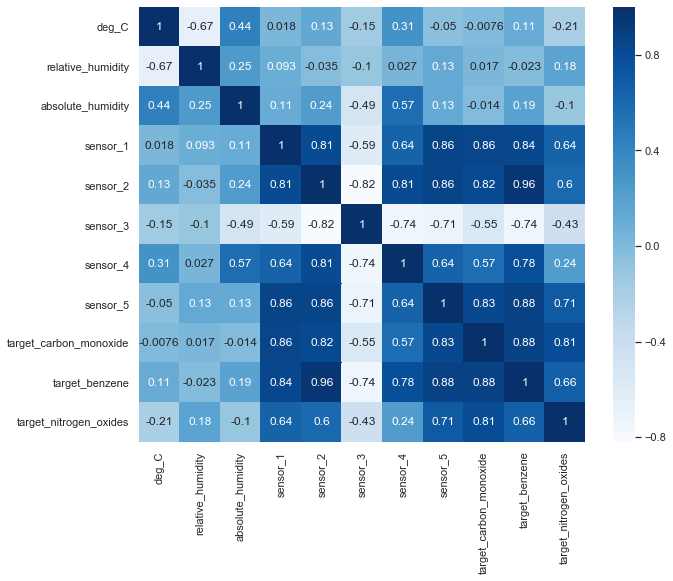

In [12]:
sns.set(rc={"figure.figsize":(10, 8)})
sns.heatmap(train_corr, cmap="Blues",annot=True)
plt.show()

Display degree data based on time lines for both train and test set

Text(0.5, 0, '')

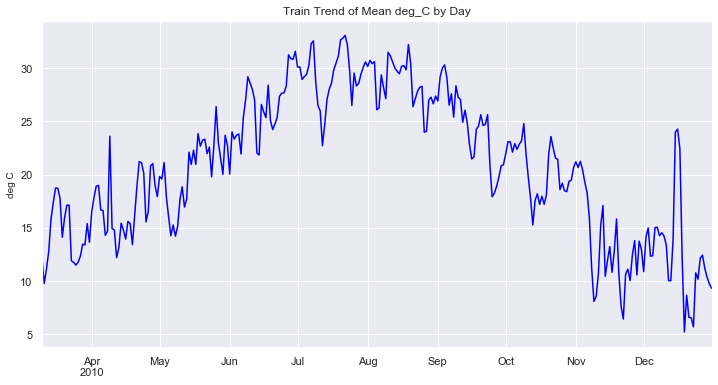

In [13]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
train["deg_C"].resample('D').mean().plot(ax=ax,alpha=1,color='blue').set_ylabel('deg C',fontsize=10)
ax.set_title('Train Trend of Mean deg_C by Day',fontsize=12)
ax.set_xlabel('')

Text(0.5, 0, '')

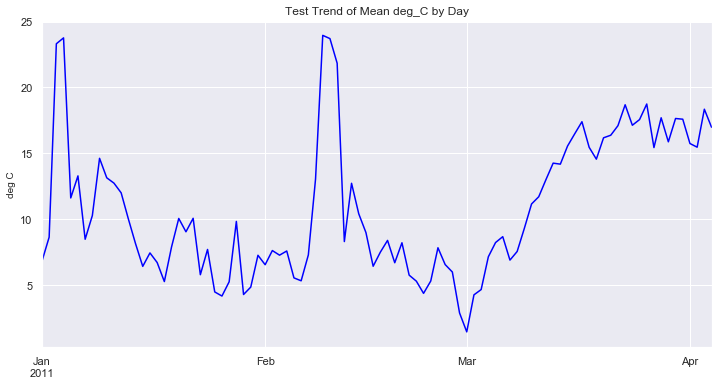

In [14]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
test["deg_C"].resample('D').mean().plot(ax=ax,alpha=1,color='blue').set_ylabel('deg C',fontsize=10)
ax.set_title('Test Trend of Mean deg_C by Day',fontsize=12)
ax.set_xlabel('')

Display humidity data based on time lines for both train and test set

Text(0.5, 0, '')

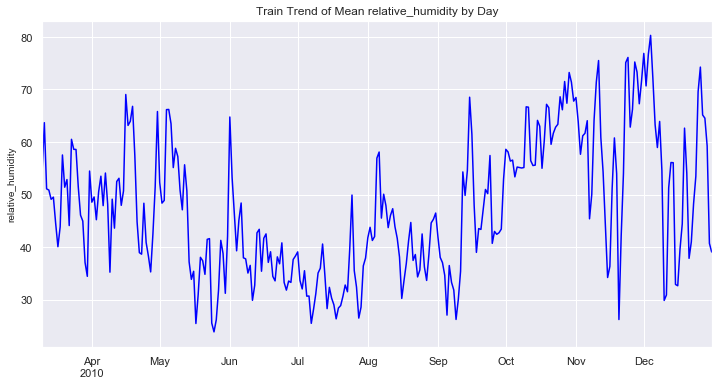

In [15]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
train["relative_humidity"].resample('D').mean().plot(ax=ax,alpha=1,color='blue').set_ylabel('relative_humidity',fontsize=10)
ax.set_title('Train Trend of Mean relative_humidity by Day',fontsize=12)
ax.set_xlabel('')

Text(0.5, 0, '')

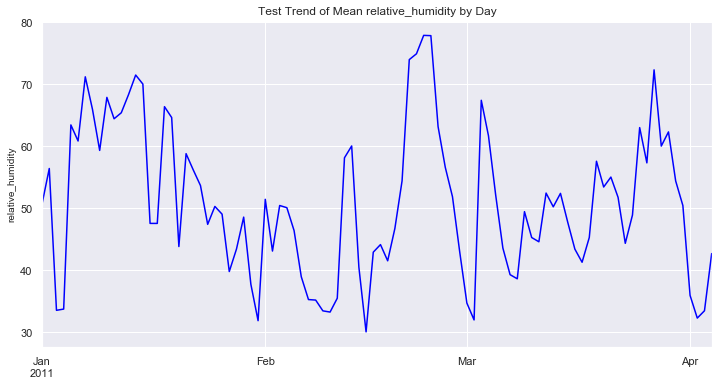

In [16]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
test["relative_humidity"].resample('D').mean().plot(ax=ax,alpha=1,color='blue').set_ylabel('relative_humidity',fontsize=10)
ax.set_title('Test Trend of Mean relative_humidity by Day',fontsize=12)
ax.set_xlabel('')

Display the distribution of all feature data

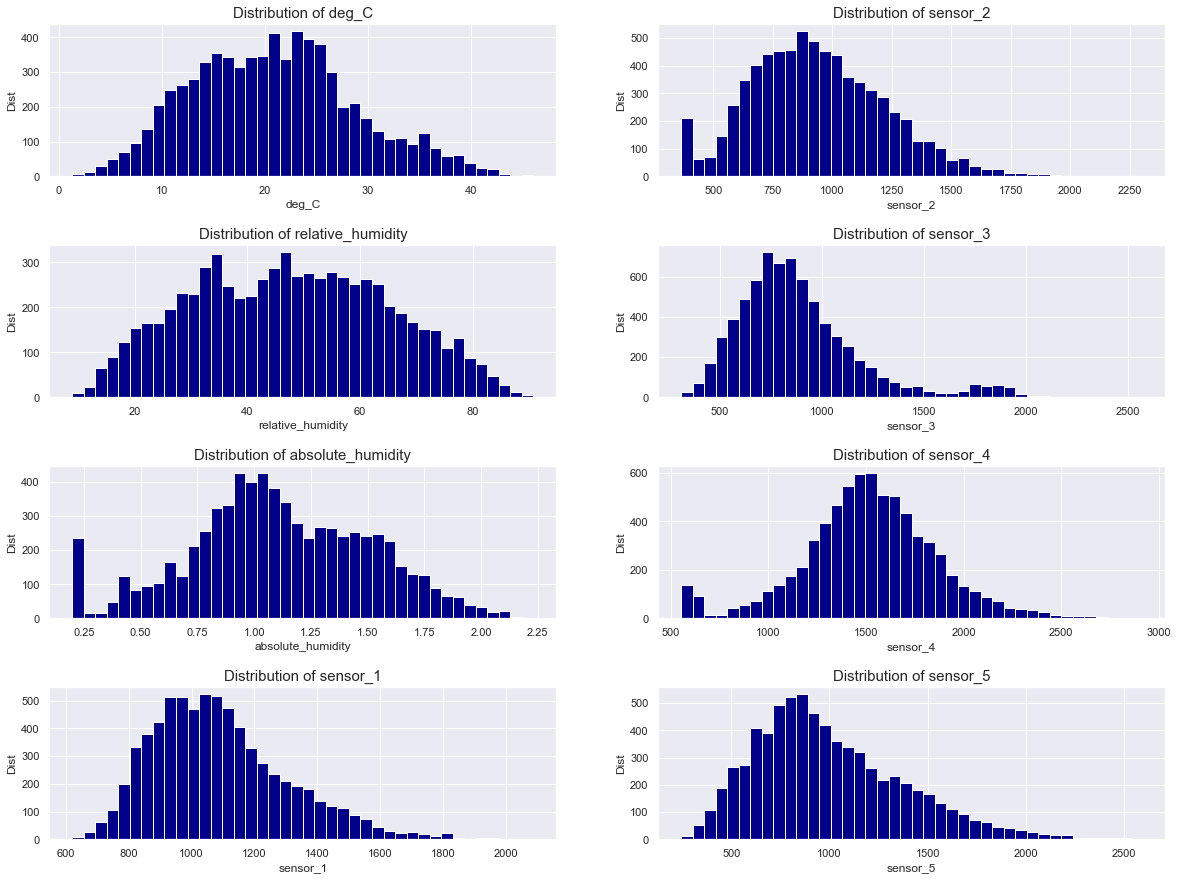

In [17]:
fig,ax=plt.subplots(4,2,figsize=(20,15))
for i,col in enumerate(train.columns[:8]):
    ax[i%4][i//4].hist(train[col],bins=40,color='darkblue',label=f'{col}')
    ax[i%4][i//4].set_title(f'Distribution of {col}',fontsize=15)
    ax[i%4][i//4].set_xlabel(f'{col}')
    ax[i%4][i//4].set_ylabel('Dist')
    plt.subplots_adjust(hspace=0.45)

Display distribution of target data

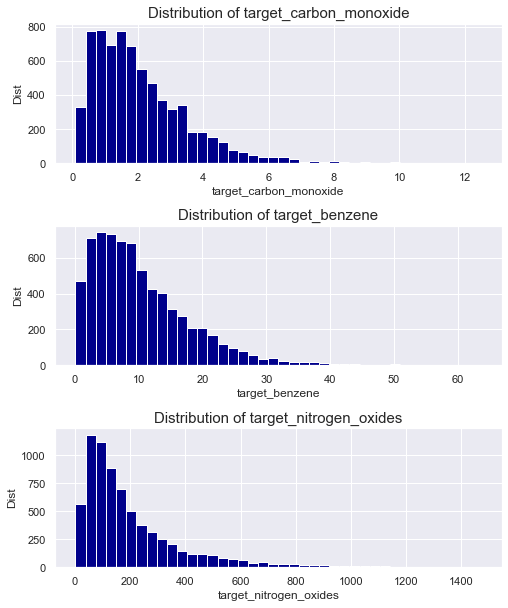

In [18]:
fig,ax=plt.subplots(3,1,figsize=(8,10))
for i,col in enumerate(train.columns[8:11]):
    ax[i%3].hist(train[col],bins=40,color='darkblue',label=f'{col}')
    ax[i%3].set_title(f'Distribution of {col}',fontsize=15)
    ax[i%3].set_xlabel(f'{col}')
    ax[i%3].set_ylabel('Dist')
    plt.subplots_adjust(hspace=0.45)

## Data processing part

In [19]:
def parse_features(df, params):
    """
    Parse date columns to detail information features like year,month,day,week and so on
    Create lag data from degree and humidity colums
    Create lag data from sensors' columns
    """
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['time'] = df.index.date - df.index.date.min()
    df['hour'] = df.index.hour
    df['time'] = df['time'].apply(lambda x : x.days)

    df['working_hours'] =  df['hour'].isin(np.arange(8, 21, 1)).astype('int')
    df['is_weekend'] = (df.index.dayofweek >= 5).astype('int')
    df['Mois_Cont'] = df['absolute_humidity']/df['relative_humidity']
    
    for periods in params[0]: # lag for degree
        df[f'dt-{periods}'] = df['deg_C'] - df['deg_C'].shift(periods=periods, fill_value=0)

    for periods in params[1]: # lag for humidity
        df[f'abs_hum-{periods}'] = df['absolute_humidity'] - df['absolute_humidity'].shift(periods=periods, fill_value=0)
        df[f'rel_hum-{periods}'] = df['relative_humidity'] - df['relative_humidity'].shift(periods=periods, fill_value=0)
        
    for periods in params[2]: # lag for sensor
        df[f's1-{periods}'] = df['sensor_1'] - df['sensor_1'].shift(periods=periods, fill_value=0)
        df[f's2-{periods}'] = df['sensor_2'] - df['sensor_2'].shift(periods=periods, fill_value=0)
        df[f's3-{periods}'] = df['sensor_3'] - df['sensor_3'].shift(periods=periods, fill_value=0)
        df[f's4-{periods}'] = df['sensor_4'] - df['sensor_4'].shift(periods=periods, fill_value=0)
        df[f's5-{periods}'] = df['sensor_5'] - df['sensor_5'].shift(periods=periods, fill_value=0)
            
    return df

In [20]:
from sklearn.preprocessing import StandardScaler

features = [col for col in train.columns if 'target_' not in col]
target = [col for col in train.columns if 'target_' in col]

train[target] = np.log1p(train[target])

train = parse_features(train, [[4,8], [4, 8], [1]])
test = parse_features(test, [[4,8], [4, 8], [1]])

scaler = StandardScaler()
scaler.fit(train[features])
train[features] = scaler.transform(train[features])
test[features] = scaler.transform(test[features])

In [21]:
import random
Config = {
    'training': True,
    'seed': 2021,
}
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(Config['seed'])

In [22]:
from sklearn.model_selection import train_test_split

if Config['training']:
    f_df = train[features].reset_index(drop=True)
    t_df = train[target].reset_index(drop=True)
    X_train,X_valid,y_train,y_valid = train_test_split(f_df,t_df)
else:
    X_train = train[features].reset_index(drop=True)
    y_train = train[target].reset_index(drop=True)
    
X_test = test[features].reset_index(drop=True)

## Modeling part

In [23]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import ExtraTreesRegressor, VotingRegressor, RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import lightgbm as lgb
import xgboost as xgb
import catboost as cbt

#### The idea behind the VotingRegressor is to combine conceptually different machine learning regressors and return the average predicted values. Such a regressor can be useful for a set of equally well performing models in order to balance out their individual weaknesses.

In [24]:
%%time
rmsle = np.zeros((len(target)))
results = []
for i, col in enumerate(target):
    model1 = lgb.LGBMRegressor(seed=Config['seed'])
    model2 = xgb.XGBRegressor(seed=Config['seed'])
    model3 = cbt.CatBoostRegressor(random_seed=Config['seed'], verbose=False)
    model5 = Ridge(normalize=True)
    model6 = ExtraTreesRegressor(random_state=Config['seed'], n_jobs=-1)
    model7 = RandomForestRegressor(random_state=Config['seed'], n_jobs=-1)
    model8 = HistGradientBoostingRegressor(random_state=Config['seed'])
    
    model = VotingRegressor(
        estimators=[
            ('lgb', model1),
            ('xgb', model2),
            ('cbt', model3),
            ('rig', model5),
            ('etr', model6),
            ('rfr', model7),
            ('hgb', model8)
        ],
    )
    model.fit(X_train, y_train[col])
    pred = np.expm1(model.predict(X_test))
    
    model_v1 = VotingRegressor(
        estimators=[
            ('etr', model6),
            ('rfr', model7),
            ('hgb', model8)
        ],
    )
    model_v1.fit(X_train, y_train[col])
    pred_1 = np.expm1(model_v1.predict(X_test))
    
    model_v2 = VotingRegressor(
        estimators=[
            ('lgb', model1),
            ('xgb', model2),
            ('cbt', model3)
        ],
    )
    model_v2.fit(X_train, y_train[col])
    pred_2 = np.expm1(model_v2.predict(X_test))
    
    
    if Config['training']:
        rmsle[i] = mean_squared_error(y_valid[col], model.predict(X_valid), squared=False)
        print(f"{col} rmsle: {rmsle[i]:.6f}")
        
        rm_v1 = mean_squared_error(y_valid[col], model_v1.predict(X_valid), squared=False)
        print(f"{col} model_v1 rmsle: {rm_v1:.6f}")
        
        rm_v2 = mean_squared_error(y_valid[col], model_v2.predict(X_valid), squared=False)
        print(f"{col} model_v2 rmsle: {rm_v2:.6f}")
        
        print("*"*50)

    results.append([pred,pred_1,pred_2])
if Config['training']:
    print("="*50)
    print(f"rmsle: {np.mean(rmsle):.6f}")
    print("="*50)


target_carbon_monoxide rmsle: 0.138577
target_carbon_monoxide model_v1 rmsle: 0.136733
target_carbon_monoxide model_v2 rmsle: 0.134161
**************************************************
target_benzene rmsle: 0.094673
target_benzene model_v1 rmsle: 0.091531
target_benzene model_v2 rmsle: 0.089429
**************************************************
target_nitrogen_oxides rmsle: 0.319956
target_nitrogen_oxides model_v1 rmsle: 0.311318
target_nitrogen_oxides model_v2 rmsle: 0.317842
**************************************************
rmsle: 0.184402
CPU times: user 1min 53s, sys: 6.27 s, total: 1min 59s
Wall time: 25.5 s


## Result Display part

Display results of three different combinations of voting regressor

In [33]:
results = np.array(results)

In [47]:
res_1 = pd.DataFrame(results[:,0]).T
res_1.columns=target
res_1.head()

,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,1.432483,5.575226,234.394641
1,1.982677,7.753351,304.805461
2,1.788423,7.465803,316.200854
3,1.829616,8.094278,342.742284
4,1.167244,6.447334,236.789999


In [48]:
res_2 = pd.DataFrame(results[:,1]).T
res_2.columns=target
res_2.head()

,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,1.420879,5.450542,246.632952
1,1.945428,7.614539,307.657028
2,1.885524,7.663750,334.395503
3,1.817871,8.357205,359.426357
4,1.232773,6.868813,252.665581


In [49]:
res_3 = pd.DataFrame(results[:,2]).T
res_3.columns=target
res_3.head()

,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,1.305728,5.550639,232.281197
1,1.846063,7.612691,297.011000
2,1.615156,7.397157,329.074307
3,1.747888,8.077350,366.732379
4,0.944375,6.310656,237.760772
